In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
def plot_confusion_matrix(tp, tn, fp, fn, method_name="ViT"):
    """
    Plots a row-normalized confusion matrix with accuracy and recall printed.
    True labels are on the Y-axis, predicted labels on the X-axis.
    
    Parameters:
        tp (int): True Positives
        tn (int): True Negatives
        fp (int): False Positives
        fn (int): False Negatives
        method_name (str): Name of the model/method
    """
    # Create confusion matrix
    cm = np.array([[tn, fp],
                   [fn, tp]])

    # Row-wise normalization
    row_sums = cm.sum(axis=1, keepdims=True)
    cm_percent = (cm / row_sums) * 100

    # Metrics
    total = cm.sum()
    accuracy = (tp + tn) / total
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    labels = ['Negative', 'Positive']

    plt.figure(figsize=(6.5, 5.5))
    ax = sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues",
                     xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Percentage (%)'},
                     vmin=0, vmax=100)

    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"{method_name} – Confusion Matrix (%)\n"
                 f"Accuracy: {accuracy:.4f}   |   Recall: {recall:.4f}")
    
    plt.tight_layout()
    plt.show()

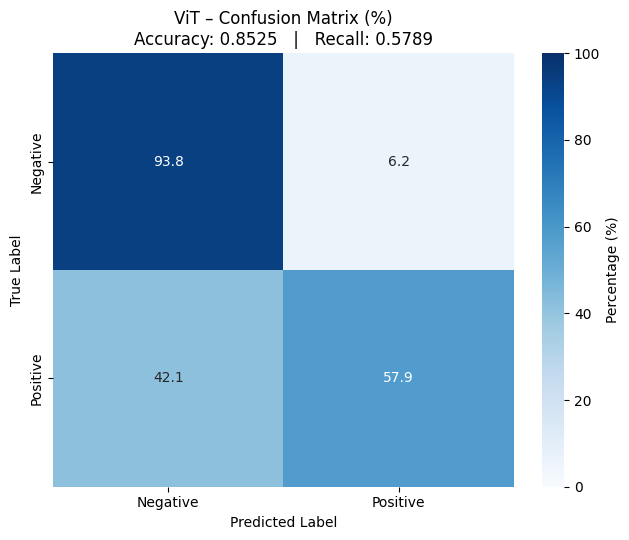

In [18]:
plot_confusion_matrix(tp=55, tn=286, fp=19, fn=40, method_name="ViT")

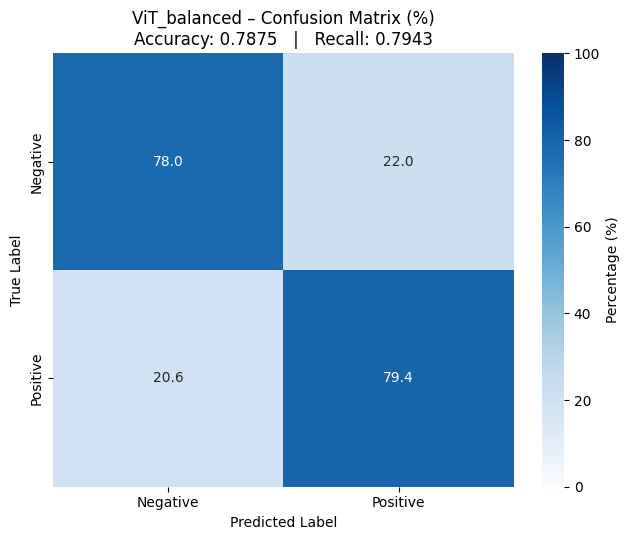

In [19]:
plot_confusion_matrix(tp=166, tn=149, fp=42, fn=43, method_name="ViT_balanced")

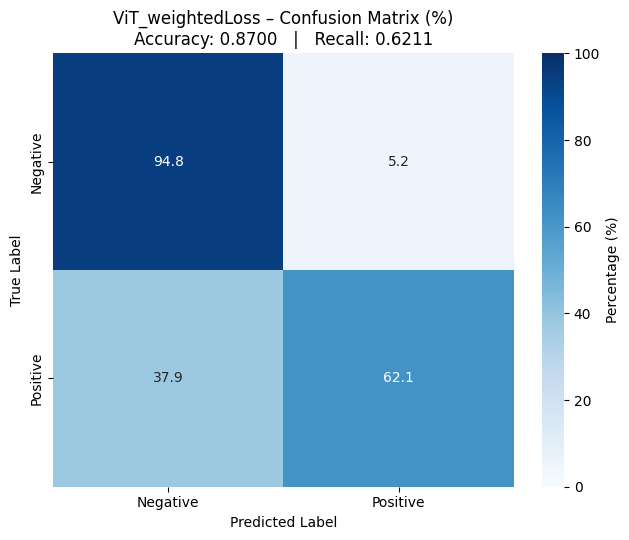

In [20]:
plot_confusion_matrix(tp=59, tn=289, fp=16, fn=36, method_name="ViT_weightedLoss")